In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
import pickle as pckl
%matplotlib inline
sns.set_style("whitegrid")

import os

In [2]:
import sys

sys.path.append('../code/')

import make_genesets

In [7]:
for geneset in ['KEGG','BIOCARTA','REACTOME']:
    make_genesets.make_overlap_gene_sets(geneset,'dorothea_AB')

In [3]:
#run_viper.R helper_merge_benchmark.py

In [11]:
#check the random distribution of ROC AUCs
results=pd.read_csv('../results/benchmark/rocaucs/progeny/single/random_dist.csv',sep=',',header=0,index_col=0)
progeny=pd.read_csv('../results/benchmark/datasets/progeny_meta.csv',
                        sep=',',header=0,index_col=0)
progeny=progeny['pathway'].value_counts()
progeny=progeny[results.index]
background=pd.DataFrame(index=results.index,columns=['Mean','Sd','Size'])
background['Mean']=np.mean(results,1)
background['Sd']=np.std(results,1)
background['Size']=progeny

In [12]:
#normalise ROCAUCS
fnames=os.listdir('../results/benchmark/rocaucs/progeny/overlap//')
data={}
for fname in fnames:
    data[fname[:-4]]=pd.read_csv('../results/benchmark/rocaucs/progeny/overlap//'+fname,sep=',',header=0,index_col=0)
for method in data.keys():
    for pw in background.index:
        data[method].loc[pw,:]=(data[method].loc[pw,:]-0.5)/background.loc[pw,'Sd']
for method in data.keys():
    data[method].to_csv('../results/benchmark/z_scores/progeny/overlap//%s.csv' % method, sep=',')

In [96]:
dname1='dorothea_AB'
dname2='BIOCARTA'
bname='progeny'
sim_type='jaccard'
abs_type=False
size_fil=False
th=4.5

In [97]:
if abs_type:
    activity1=pd.read_csv('../results/benchmark/z_scores/%s/single/%s_abs.csv' % (bname,dname1),
                              sep=',',header=0,index_col=0).abs().max()
    activity2=pd.read_csv('../results/benchmark/z_scores/%s/single/%s_abs.csv' % (bname,dname2),
                              sep=',',header=0,index_col=0).abs().max()
else:
    activity1=pd.read_csv('../results/benchmark/z_scores/%s/single/%s.csv' % (bname,dname1),
                              sep=',',header=0,index_col=0).abs().max()
    activity2=pd.read_csv('../results/benchmark/z_scores/%s/single/%s.csv' % (bname,dname2),
                              sep=',',header=0,index_col=0).abs().max()

In [98]:
good1=activity1.index[activity1>th]
good2=activity2.index[activity2>th]

In [99]:
if dname1<dname2:
    overlap_name=dname1+'_overlap_'+dname2
else:
    overlap_name=dname2+'_overlap_'+dname1

In [100]:
activity1m2=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_minus_%s.csv' % (bname,dname1,dname2),
                       sep=',',header=0,index_col=0).abs().max()
activity2m1=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_minus_%s.csv' % (bname,dname2,dname1),
                       sep=',',header=0,index_col=0).abs().max()
activity1o2=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s.csv' % (bname,overlap_name),
                       sep=',',header=0,index_col=0).abs().max()


In [101]:
activity1m2=pd.DataFrame(activity1m2,columns=['Score'])
activity1m2['First']=pd.Series(activity1m2.index).apply(lambda x:x.split('*')[0]).values
activity1m2['Second']=pd.Series(activity1m2.index).apply(lambda x:x.split('*')[1]).values
fil=np.in1d(activity1m2['First'],good2) & np.in1d(activity1m2['Second'],good1)
activity1m2=activity1m2[fil]

In [102]:
activity2m1=pd.DataFrame(activity2m1,columns=['Score'])
activity2m1['First']=pd.Series(activity2m1.index).apply(lambda x:x.split('*')[0]).values
activity2m1['Second']=pd.Series(activity2m1.index).apply(lambda x:x.split('*')[1]).values
fil=np.in1d(activity2m1['First'],good2) & np.in1d(activity2m1['Second'],good1)
activity2m1=activity2m1[fil]

In [103]:
activity2m1

,Score,First,Second
BIOCARTA_41BB_PATHWAY*E2F1,10.030391,BIOCARTA_41BB_PATHWAY,E2F1
BIOCARTA_41BB_PATHWAY*EGR1,8.848110,BIOCARTA_41BB_PATHWAY,EGR1
BIOCARTA_41BB_PATHWAY*ETS1,9.937088,BIOCARTA_41BB_PATHWAY,ETS1
BIOCARTA_41BB_PATHWAY*NFKB1,8.191658,BIOCARTA_41BB_PATHWAY,NFKB1
BIOCARTA_41BB_PATHWAY*RELA,5.825764,BIOCARTA_41BB_PATHWAY,RELA
BIOCARTA_41BB_PATHWAY*SP1,8.932749,BIOCARTA_41BB_PATHWAY,SP1
BIOCARTA_41BB_PATHWAY*STAT1,9.405262,BIOCARTA_41BB_PATHWAY,STAT1
BIOCARTA_AGR_PATHWAY*CEBPA,6.572479,BIOCARTA_AGR_PATHWAY,CEBPA
BIOCARTA_AGR_PATHWAY*E2F1,5.673900,BIOCARTA_AGR_PATHWAY,E2F1
BIOCARTA_AGR_PATHWAY*ESR1,6.147124,BIOCARTA_AGR_PATHWAY,ESR1


In [104]:
print(np.median(activity1[good1]),np.std(activity1[good1]))
print(np.median(activity2[good2]),np.std(activity2[good2]))
print(np.median(activity1m2['Score']),np.std(activity1m2['Score']))
print(np.median(activity2m1['Score']),np.std(activity2m1['Score']))

6.300942281013567 1.7094404443476166
6.206912357299801 1.6251124997766773
6.502209885737893 1.7364495079858684
6.043178931311537 1.8577384876369896


/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


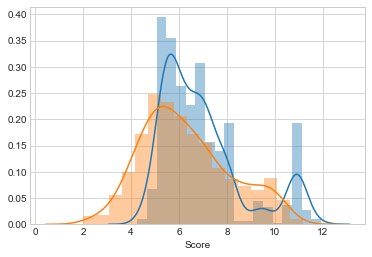

In [105]:
sns.distplot(activity1m2['Score'])
sns.distplot(activity2m1['Score'])

In [ ]:
ac